In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [12]:
times = pd.read_csv('data/entry-times.csv')

times.created_at = pd.to_datetime(times.created_at).dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')

gate_open_times_by_year = {2017: pd.to_datetime('2017-08-27 00:01:00.00000').tz_localize('America/Los_Angeles'),
                  2016: pd.to_datetime('2016-08-28 00:01:00.00000').tz_localize('America/Los_Angeles'),
                  2015: pd.to_datetime('2015-08-30 10:00:00.00000').tz_localize('America/Los_Angeles'),
                  2014: pd.to_datetime('2014-08-24 10:00:00.00000').tz_localize('America/Los_Angeles')}

times = times.drop(times.index[4])
times.wait_time_min = pd.to_numeric(times.wadtogatemin)

times['year'] = times.created_at.map(lambda r: r.year)
times['gate_open_time'] = times.year.map(lambda year: gate_open_times_by_year[year])
times.hourly_created_at = times.created_at.map(lambda x: x.round(freq='h'))
times['time_since_gate_open'] = times.created_at - times.gate_open_time
times['td_hourly_time_since_gate_open'] = times.hourly_created_at - times.gate_open_time
times['hourly_time_since_gate_open'] = times.td_hourly_time_since_gate_open.map(lambda x: ((x.days * 24) + (x.seconds//3600)))
times['wadtogate_hour_frac'] = times.wadtogatemin /60
times['gatewait_hour_frac'] = times.gatewait /60

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


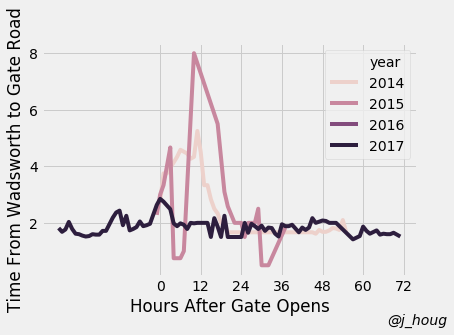

In [19]:
plt.style.use('fivethirtyeight')
ax = sns.lineplot(x="hourly_time_since_gate_open", y="wadtogate_hour_frac",
                   hue="year", data=times[times.hourly_time_since_gate_open < 80])
ax.set(xlabel='Hours After Gate Opens', ylabel='Time From Wadsworth to Gate Road')
ax.set_xticks([0, 12, 24, 36, 48, 60, 72])
plt.text(67, -1.6,'@j_houg', fontstyle='italic')
plt.savefig("img/w-2-8mi-by-year.png", bbox_inches='tight')

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


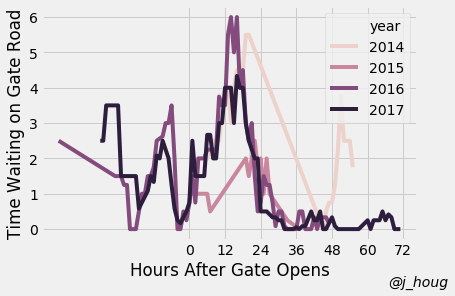

In [20]:
plt.style.use('fivethirtyeight')
ax = sns.lineplot(x="hourly_time_since_gate_open", y="gatewait_hour_frac",
                   hue="year", data=times[times.hourly_time_since_gate_open < 80])
ax.set(xlabel='Hours After Gate Opens', ylabel='Time Waiting on Gate Road')
ax.set_xticks([0, 12, 24, 36, 48, 60, 72])
plt.text(67, -1.6,'@j_houg', fontstyle='italic')
plt.savefig("img/gate-wait-by-year.png", bbox_inches='tight')

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


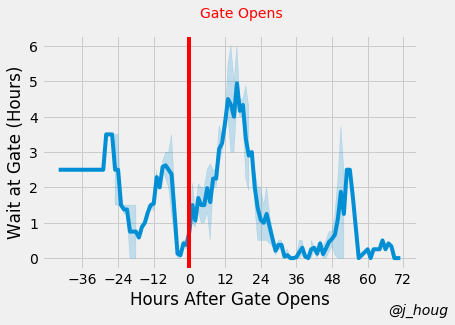

In [21]:
plt.style.use('fivethirtyeight')
ax = sns.lineplot(x="hourly_time_since_gate_open", y="gatewait_hour_frac",
                   data=times[times.hourly_time_since_gate_open < 80])
ax.set(xlabel='Hours After Gate Opens', ylabel='Wait at Gate (Hours)')
ax.set_xticks([-36, -24, -12, 0, 12, 24, 36, 48, 60, 72])
plt.axvline(x=0, color='red')
plt.text(3.6,6.8,'Gate Opens', color='red')
plt.text(67, -1.6,'@j_houg', fontstyle='italic')
plt.savefig("img/gate-wait-w-error.png", bbox_inches='tight')

/Users/juliethougland/.virtualenvs/py3etl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


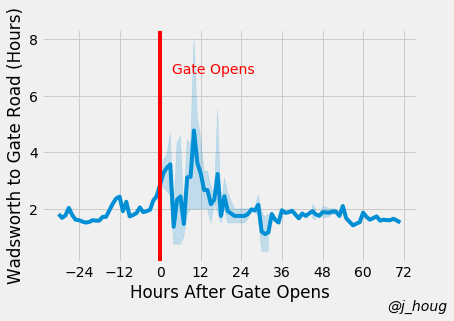

In [22]:
plt.style.use('fivethirtyeight')
ax = sns.lineplot(x="hourly_time_since_gate_open", y="wadtogate_hour_frac",
                   data=times[times.hourly_time_since_gate_open < 80])
ax.set(xlabel='Hours After Gate Opens', ylabel='Wadsworth to Gate Road (Hours)')
ax.set_xticks([-24, -12, 0, 12, 24, 36, 48, 60, 72])
plt.axvline(x=0, color='red')
plt.text(3.6,6.8,'Gate Opens', color='red')
plt.text(67, -1.6,'@j_houg', fontstyle='italic')
plt.savefig("img/w-2-gate-w-error.png",bbox_inches='tight')